# Insurance Premium Prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter


In [2]:
%matplotlib inline
rcParams['figure.figsize']=5, 4

In [3]:
address = "C:/Users/epeysni/Documents/Shivani_Docs/AI ML Courses/CBD 2214 BIG DATA FUNDAMENTALS/Big Data Assignment Project/insurance.csv"

df = pd.read_csv(address)
df.columns =['age', 'sex' , 'bmi' , 'children' , 'smoker' , 'region', 'expenses']

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

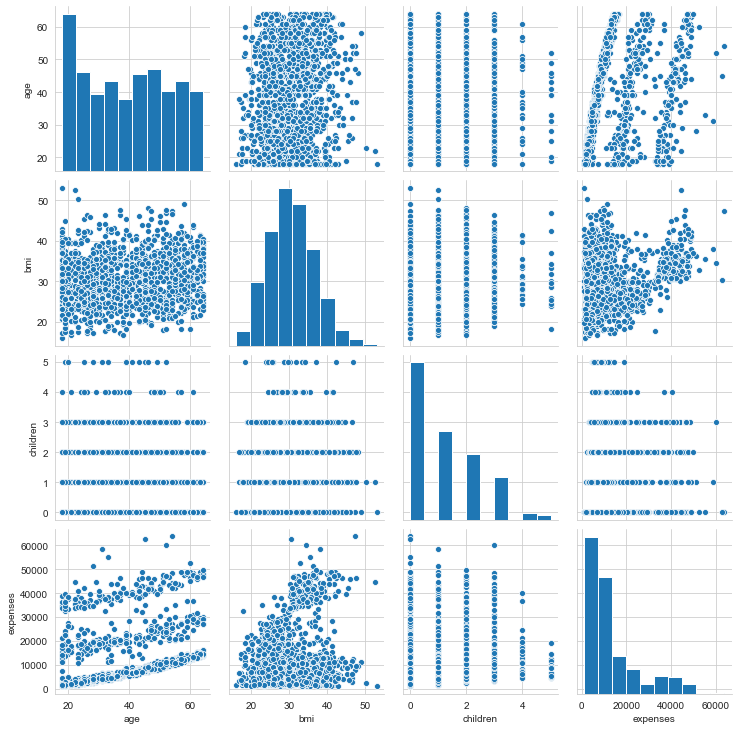

In [7]:
#According to linear model our predictors should be continuous numeric . Also, predictors and predictant should have linear relationship. To check correlation we use scatter plot

sb.pairplot(df)

In [8]:
# Depicting correlation matrix

print(df.corr())

               age       bmi  children  expenses
age       1.000000  0.109341  0.042469  0.299008
bmi       0.109341  1.000000  0.012645  0.198576
children  0.042469  0.012645  1.000000  0.067998
expenses  0.299008  0.198576  0.067998  1.000000


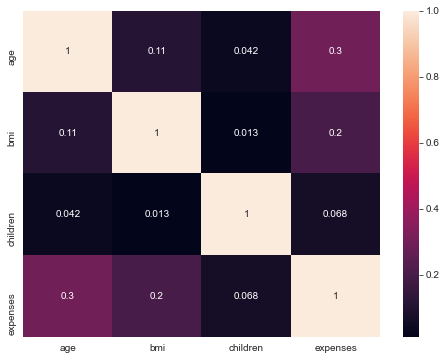

In [9]:
# correlation using heatmap

plt.figure(figsize=(8,6))
sb.heatmap(df.corr(), annot = True)

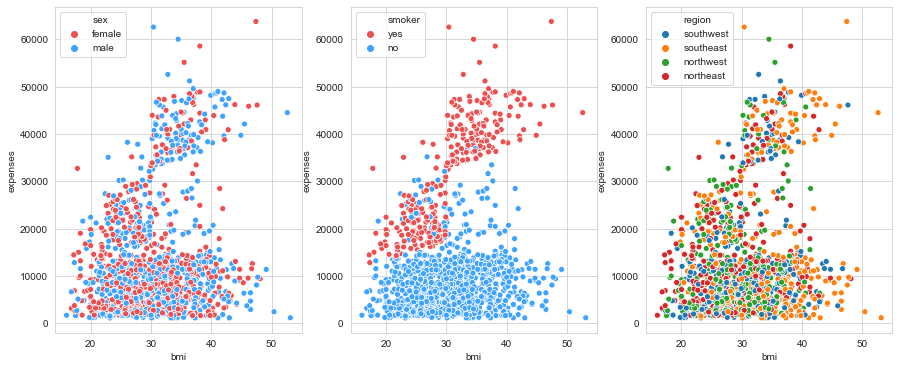

In [11]:
palette=['#EB5050','#3EA2FF']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sb.scatterplot(x='bmi', y='expenses', ax=axes[0], data=df,hue='sex', palette=palette)
sb.scatterplot(x='bmi', y='expenses', ax=axes[1], data=df,hue='smoker', palette=palette)
sb.scatterplot(x='bmi', y='expenses', ax=axes[2], data=df,hue='region')

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
df.drop(["region"], axis=1, inplace=True) 
df.head()

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [14]:
# Changing binary categories to 1s and 0s
df['sex'] = df['sex'].map(lambda s :1  if s == 'female' else 0)
df['smoker'] = df['smoker'].map(lambda s :1  if s == 'yes' else 0)

df.head()

,age,sex,bmi,children,smoker,expenses
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

NameError: name 'X' is not defined

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

In [ ]:
LinReg = LinearRegression(normalize=True)
LinReg.fit(X,y)
print(LinReg.score(X,y))